In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency
import statsmodels.api

In [3]:
# Lecture des données
data=pd.read_excel('cars_acceleration_regression_simple.xlsx')
data

,horesepower,acceleration
0,140,16.0
1,67,16.0
2,68,16.6
3,81,16.9
4,97,15.0
...,...,...
225,84,16.0
226,80,16.5
227,64,16.4
228,97,13.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   horesepower   230 non-null    int64  
 1   acceleration  230 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.7 KB


In [5]:
data.describe()

,horesepower,acceleration
count,230.000000,230.000000
mean,106.878261,15.317391
std,38.945185,2.641482
min,46.000000,8.000000
25%,79.250000,13.700000
50%,95.000000,15.200000
75%,137.750000,16.900000
max,230.000000,24.800000


<div style="background-color: RGB(252,190,3)" >
<h2 style="margin: auto; padding: 10px;  ">Création du modéle</h2>
</div> 

In [39]:
# Construction du modèle de régression linéaire Y = aX +b
import statsmodels.api as sm
Y = data['acceleration']      # Double crochet car on passe en argument une liste de colonnes 
X = data[['horesepower']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
#Création des variables a et b contenent les estimations
a,b = result.params['horesepower'],result.params['intercept']
print( "a = " ,a,   "b = ", b)
result.params
print(result.summary())

a =  -0.04639186252776391 b =  20.275672889815187
                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     200.4
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           4.51e-33
Time:                        10:50:03   Log-Likelihood:                -476.72
No. Observations:                 230   AIC:                             957.4
Df Residuals:                     228   BIC:                             964.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


<div style="background-color: RGB(252,190,3)" >
<h2 style="margin: auto; padding: 10px;  ">Affichage du Nuage de points et de la droite de regression</h2>
</div> 

Text(0, 0.5, 'Acceleration')

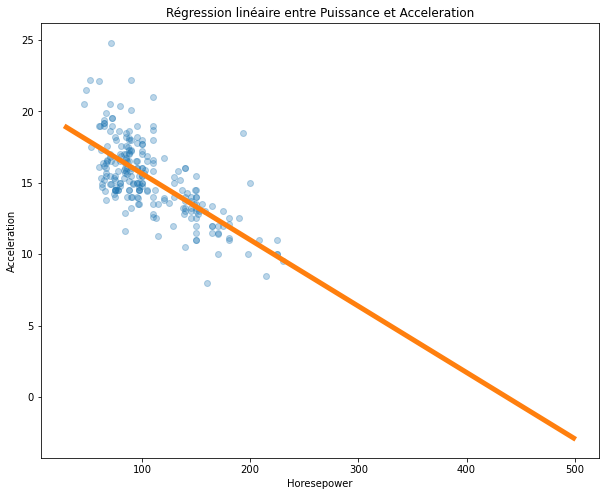

In [17]:
# Affichage  du nuage de point et de la droite de regression 
plt.figure(figsize=(10,8))
plt.title("Régression linéaire entre Puissance et Acceleration")
plt.plot(data.horesepower, data.acceleration, "o", alpha=0.3)
plt.plot(np.arange(30,500),[a*x+b for x in np.arange(30,500)], linewidth=5)

plt.xlabel("Horesepower")
plt.ylabel("Acceleration")

<div style="background-color: RGB(252,190,3)" >
<h2 style="margin: auto; padding: 10px;  ">Prédiction de Y en fonction des valeurs de X</h2>
</div> 

In [20]:
#Prédiction de  Y en fonction de X
X = 100
Y = a*X + b
Y

15.636486637038796

In [40]:
#Prédiction de  Y en fonction de X
X = 200
Y = a*X + b
Y

10.997300384262406

In [44]:
#Prédiction de  Y en fonction de X
for X in np.arange(100,500,10):
    Y = a*X + b
    print("pour X = " , X , " : Y = ", Y)


pour X =  100  : Y =  15.636486637038796
pour X =  110  : Y =  15.172568011761157
pour X =  120  : Y =  14.708649386483518
pour X =  130  : Y =  14.24473076120588
pour X =  140  : Y =  13.78081213592824
pour X =  150  : Y =  13.316893510650601
pour X =  160  : Y =  12.852974885372962
pour X =  170  : Y =  12.389056260095323
pour X =  180  : Y =  11.925137634817684
pour X =  190  : Y =  11.461219009540045
pour X =  200  : Y =  10.997300384262406
pour X =  210  : Y =  10.533381758984767
pour X =  220  : Y =  10.069463133707128
pour X =  230  : Y =  9.605544508429489
pour X =  240  : Y =  9.14162588315185
pour X =  250  : Y =  8.67770725787421
pour X =  260  : Y =  8.213788632596572
pour X =  270  : Y =  7.749870007318933
pour X =  280  : Y =  7.2859513820412936
pour X =  290  : Y =  6.8220327567636545
pour X =  300  : Y =  6.3581141314860155
pour X =  310  : Y =  5.894195506208376
pour X =  320  : Y =  5.430276880930737
pour X =  330  : Y =  4.9663582556530965
pour X =  340  : Y =  4.502